In [1]:
import pickle, os
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from IPython.display import display, HTML
import seaborn as sns
from scipy.stats import fisher_exact,norm
from scipy.stats import mannwhitneyu as mwu
#display(HTML("<style>.container { width:100% !important; }</style>"))
#display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
pd.set_option("display.max_columns", 50)



C:\Users\astar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#ak_h5 = h5py.File("HumChp_ChromBPNet_Input_HumanDerived.sorted.chr10__ProximalTubule_all.merged__Proximal_Tubule__combined-sc2.variant_predictions.h5", "r")
#var = pd.read_csv("HumChp_ChromBPNet_Input_HumanDerived.sorted.chr10__ProximalTubule_all.merged__Proximal_Tubule__combined-sc2.variant_scores.tsv", sep = "\t")

#ah_h5 = h5py.File("HumChp_ChromBPNet_Input_HumanDerived.sorted.chr3__Ventricular_cardiomyocyte_Adult_Heart_peaks__Ventricular_cardiomyocyte__combined-sc2.variant_predictions.h5", 'r')
#var = pd.read_csv("HumChp_ChromBPNet_Input_HumanDerived.sorted.chr3__Ventricular_cardiomyocyte_Adult_Heart_peaks__Ventricular_cardiomyocyte__combined-sc2.variant_scores.tsv", sep = "\t")
#var[var["pos"].isin([2350848, 2350877, 2350896])]
#var[var["pos"].isin([196632441, 196632696])]

#an_h5 = h5py.File("HumChp_ChromBPNet_Input_HumanDerived.sorted.chr2.LiangSteinNeuron.variant_predictions.h5", 'r')
#var = pd.read_csv("HumChp_ChromBPNet_Input_HumanDerived.sorted.chr2.LiangSteinNeuron.variant_scores.tsv", sep = "\t")
#GRIN2A
#var[var["pos"].isin([9986165, 9987249, 9987267, 10067542])]

#VLDLR
#var[var["pos"].isin([2566108])]

#GRIN3A
#var[var["pos"].isin([101826758, 101826750, 101826681])]

#VWC2L
#var[var["pos"].isin([214548099, 214534331])]

ag_h5 = h5py.File("HumChp_ChromBPNet_Input_HumanDerived.sorted.chr5__preGC_IIa_Female_peaks__preGC_IIa_Female__combined-sc2.variant_predictions.h5", 'r')
var = pd.read_csv("HumChp_ChromBPNet_Input_HumanDerived.sorted.chr5__preGC_IIa_Female_peaks__preGC_IIa_Female__combined-sc2.variant_scores.tsv", sep = "\t")

#FGF10
var[var["pos"].isin([44183845, 44457229, 44482081])]

,chr,pos,allele1,allele2,variant_id,allele1_pred_counts,allele2_pred_counts,logfc,abs_logfc,jsd,original_jsd,logfc_x_jsd,abs_logfc_x_jsd
208784,chr5,44183845,A,C,chr5:44183845,121.037550,82.29432,-0.556590,0.556590,0.063544,0.063544,-0.035368,0.035368
209809,chr5,44457229,T,C,chr5:44457229,93.351715,128.00229,0.455421,0.455421,0.058035,0.058035,0.026430,0.026430
209911,chr5,44482081,C,G,chr5:44482081,121.718860,175.69580,0.529527,0.529527,0.046364,0.046364,0.024551,0.024551


In [31]:
v2 = var[var["pos"].isin(list(range(9986164-2000, 9986164+2000)))]
#v2 = v2[v2["abs_logfc"] > 0.1]


In [32]:
v2

,chr,pos,allele1,allele2,variant_id,allele1_pred_counts,allele2_pred_counts,logfc,abs_logfc,jsd,original_jsd,logfc_x_jsd,abs_logfc_x_jsd
53888,chr16,9984182,T,A,chr16:9984182,150.84756,148.11832,-0.026341,0.026341,0.013399,0.013399,-3.529528e-04,3.529528e-04
53889,chr16,9984385,G,T,chr16:9984385,141.25308,141.47272,0.002241,0.002241,0.005331,0.005331,1.194809e-05,1.194809e-05
53890,chr16,9984428,T,C,chr16:9984428,141.50128,144.04787,0.025733,0.025733,0.006408,0.006408,1.648961e-04,1.648961e-04
53891,chr16,9984429,G,C,chr16:9984429,141.54419,142.45230,0.009226,0.009226,0.005896,0.005896,5.439418e-05,5.439418e-05
53892,chr16,9984468,C,T,chr16:9984468,142.74007,140.59343,-0.021861,0.021861,0.004562,0.004562,-9.973320e-05,9.973320e-05
53893,chr16,9984688,G,A,chr16:9984688,141.43076,142.14020,0.007219,0.007219,0.007263,0.007263,5.243253e-05,5.243253e-05
53894,chr16,9984824,T,C,chr16:9984824,139.17166,141.25436,0.021430,0.021430,0.004048,0.004048,8.673754e-05,8.673754e-05
53895,chr16,9984939,T,C,chr16:9984939,143.19357,141.48413,-0.017326,0.017326,0.008313,0.008313,-1.440379e-04,1.440379e-04
53896,chr16,9985304,A,C,chr16:9985304,162.79834,166.11505,0.029097,0.029097,0.008397,0.008397,2.443237e-04,2.443237e-04
53897,chr16,9985624,A,G,chr16:9985624,179.32877,179.31158,-0.000138,0.000138,0.003306,0.003306,-4.568799e-07,4.568799e-07


In [22]:
var[var["pos"].isin([pos])]

,chr,pos,allele1,allele2,variant_id,allele1_pred_counts,allele2_pred_counts,logfc,abs_logfc,jsd,original_jsd,logfc_x_jsd,abs_logfc_x_jsd
412597,chr10,100731367,G,C,chr10:100731367,8650.713,4288.2417,-1.012433,1.012433,0.143639,0.143639,-0.145425,0.145425


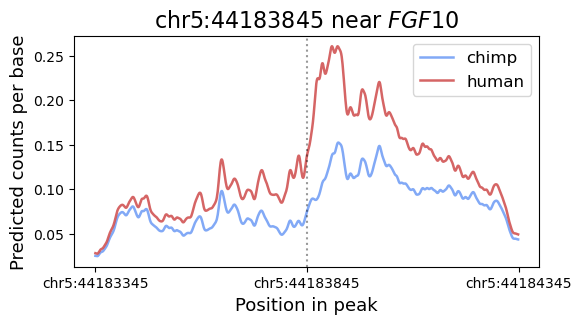

In [5]:
#For RXRA PAX2 variant
#pos = 100731367
#chrom = "chr10:"
#loc = 412597
#h5 = ak_h5

#For METTL4 HAQER
#pos = 2350896 #or 2350848 or 2350877
#chrom = "chr18:"
#loc = 12041 #or 12036 or 12039
#h5 = ah_h5

#For NRROS HAQER
#pos = 196632696 # or 196632441
#chrom = "chr3:"
#loc = 862965 # or 862956
#h5 = ah_h5

#For GRIN2A
#pos = 9986165 # 9986165 or 9987249 or 9987267 or 10067542
#chrom = "chr16:"
#loc = 53904 #53904 or 53910 or 53911 or 54411
#h5 = an_h5

#For VLDLR
#pos = 2566108
#chrom = "chr9:"
#loc = 13772
#h5 = an_h5

#For GRIN3A
#pos = 101826758 # 101826681 or 101826750 or 101826758
#chrom = "chr9:"
#loc = 324105 # 324102 or 324104 or 324105
#h5 = an_h5

#For VWC2L
#pos = 214548099 # 214548099 or 214548099
#chrom = "chr2:"
#loc = 918907 # 918842 or 918907
#h5 = an_h5

#For FGF10
pos = 44183845 # 44183845 or 44457229 or 44482081
chrom = "chr5:"
loc = 208784 # 208784 or 209809 or 209911
h5 = ag_h5

ind = var[var["pos"].isin([pos])].index[0]
hum_counts = h5['observed']["allele1_pred_counts"][loc]
chp_counts = h5['observed']["allele2_pred_counts"][loc]

hum_prof = h5['observed']["allele1_pred_profiles"][loc]
chp_prof = h5['observed']["allele2_pred_profiles"][loc]
hum_sprof = hum_counts*hum_prof
chp_sprof = chp_counts*chp_prof
palette = {"human":"#D15454", "chimp":"#74A0F5"}

fig, ax = plt.subplots(figsize = (6, 3))
print()
smooth = gaussian_filter1d(chp_sprof, sigma=4)
plt.plot(range(557, 1557), smooth, linewidth=1.8, label = "chimp", alpha=0.9, color = palette["chimp"])
smooth = gaussian_filter1d(hum_sprof, sigma=4)
plt.plot(range(557, 1557), smooth, linewidth=1.8, label = "human", alpha=0.9, color = palette["human"])

#plt.title("HAQER near $\it{METTL4}$: " + chrom + str(pos), size = 16)
#plt.title("HAQER near $\it{NRROS}$: " + chrom + str(pos), size = 16)
#plt.title("NFIB binding site near $\it{VLDLR}$", size = 16)
#plt.title(chrom + str(pos) + " in HAR near $\it{GRIN3A}$", size = 16)
plt.title(chrom + str(pos) + " near $\it{FGF10}$", size = 16)
plt.xlabel("Position in peak", size = 13)
plt.ylabel("Predicted counts per base", size = 13)
#plt.xlim(0, 1000)
#plt.ylim(0, None)
plt.axvline(x=1057, color='black', linestyle=':', alpha=0.4)
plt.xticks([557, 1057, 1557], [chrom + str(pos-500),chrom + str(pos),chrom + str(pos+500)])
plt.legend(fontsize = 12)
#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [ ]:
palette = {"human":"#D15454", "chimp":"#74A0F5", "gorilla":"#666666", "ancestral":"orange"}
#2662, 9236 best candidates for plotting for grant for specific to profile
#18857 has kind of clear opposing profile with reinforcing lfc?
#Interestingly, it is an enhancer for the protocadherin cluster!
#chr5:141040260-141042374
#7458 also works, is promoter-like HAQER1403 near LRRK1, but is potentially selected in gorilla too at profile level
#13657 has very little profile change, but is biased toward upregulation
#Might be ILS though as gorilla also has very low p-value?  Though I don't really understand how the gorilla works.
#Contains conserved CTCF binding site with weaker binding in gorilla, contains mutation that disrupts CTCF binding specific to gorilla
#Suggests that it may be compensatory increase in accessibility to fight fixation of the CTCF disrupting site!
all_meta = pd.read_csv("LSN-b0.25_gokhman3.all.metadata.tsv.gz", sep = "\t")
all_meta = all_meta[~all_meta["class"].isin(["MH.MPRA", "Ultra.Conserved"])]
all_meta_anc = all_meta[all_meta["sequence_type"].isin(["ancestral", "ancestral.HCG_ancestral"])]


recordID = all_meta[all_meta["idx"] == ancestral_idx]["record_ID"].loc[all_meta[all_meta["idx"] == ancestral_idx].index[0]]
meta_rec = all_meta[all_meta["record_ID"] == recordID]
ids = list(meta_rec["idx"])
for idx, id in enumerate(ids):
    metadata = all_meta.loc[id] 
    name = metadata['sequence_type'].replace("derived.AH.H_ancestral", "human")
    #if name in ["human", "chimp", "ancestral", "gorilla"]:
    if name in ["human", "chimp"]:
        count = np.exp(all_predictions_h5['predictions/logcounts'][id])-1
        profile = all_predictions_h5['predictions/profiles'][id]
        abs_profile = count * profile
        if name == "chimp":
            chimp_profile = profile
            chimp_abs_profile = abs_profile
        elif name == "human":
            human_profile = profile
            human_abs_profile = abs_profile
        smooth = gaussian_filter1d(abs_profile, sigma=4)
        plt.plot(range(557, 1557), smooth, linewidth=1.8, label = name, alpha=0.9, color = palette[name])

            

#for index, profile in real_profs.drop(["Unnamed: 0"], axis = 1).iterrows():
#    print(float(real_counts.loc[index][0]))
#    abs_profile = float(real_counts.loc[index][1])*profile
#    smooth = gaussian_filter1d(profile, sigma=4)
#    plt.plot(range(557, 1557), smooth, linewidth=0.8, label = "Var" + str(index), alpha=0.5, color = "magenta")

#profile_sum = np.sum(real_profs.drop(["Unnamed: 0"], axis = 1))/len(real_profs.index)
#smooth = gaussian_filter1d(profile_sum, sigma=4)
#plt.plot(range(557, 1557), smooth, linewidth=1.8, label = "Summed var effects", alpha=0.9, color = "green")

#plt.title(f"ancestral_idx {ancestral_idx}")
#plt.title("HAQER1079", size = 18)
plt.title("ZOOHAR.81", size = 18)
plt.xlabel("Position in peak", size = 14)
plt.ylabel("Normalized profile", size = 14)
#plt.xlim(0, 1000)
#plt.ylim(0, None)
plt.axvline(x=1057, color='black', linestyle=':', alpha=0.2)
plt.xticks([557,1057,1557])
plt.legend(fontsize = 14)
#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()